## Problem Statement : Classify incoming data for Kyphosis occurence

Link : http://www.stat.umn.edu/RegGraph/data/Kyphosis.lsp

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('dataset/kyphosis.csv')

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [4]:
sns.pairplot(df,hue='Kyphosis');

Error in callback <function flush_figures at 0x1227a0b80> (for post_execute):


KeyboardInterrupt: 

#### Train / Test Split

In [5]:
X = df.drop('Kyphosis',axis=1)

y = df['Kyphosis']

In [6]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
X_train = X[0:50]
X_test = X[51:]
y_train = y[:50]
y_test = y[51:]

#### Train using decision tree classifier

In [8]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_train,y_train)

DecisionTreeClassifier()

#### Prediction

In [9]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

y_pred_train = dtree.predict(X_train)

print(f'Train Accuracy Score :\n {accuracy_score(y_train,y_pred_train)}')
print(f'\n\nConfusion Matrix :\n {confusion_matrix(y_train,y_pred_train)}')
print(f'\n\nClassification Report :\n {classification_report(y_train,y_pred_train)}')


Train Accuracy Score :
 1.0


Confusion Matrix :
 [[39  0]
 [ 0 11]]


Classification Report :
               precision    recall  f1-score   support

      absent       1.00      1.00      1.00        39
     present       1.00      1.00      1.00        11

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [10]:
y_pred_test = dtree.predict(X_test)

print(f'Test Accuracy Score :\n {accuracy_score(y_test,y_pred_test)}')
print(f'\n\nConfusion Matrix :\n {confusion_matrix(y_test,y_pred_test)}')
print(f'\n\nClassification Report :\n {classification_report(y_test,y_pred_test)}')


Test Accuracy Score :
 0.8333333333333334


Confusion Matrix :
 [[20  4]
 [ 1  5]]


Classification Report :
               precision    recall  f1-score   support

      absent       0.95      0.83      0.89        24
     present       0.56      0.83      0.67         6

    accuracy                           0.83        30
   macro avg       0.75      0.83      0.78        30
weighted avg       0.87      0.83      0.84        30



#### Visualization of decision trees

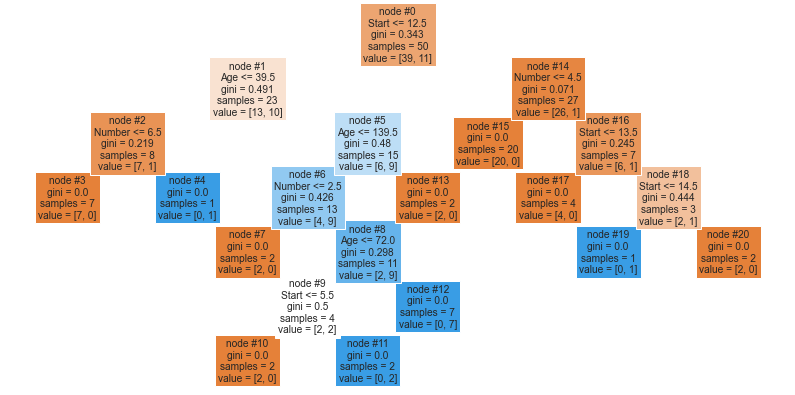

In [15]:
from sklearn.tree import plot_tree

features = list(df.columns[1:])

plt.figure(figsize=(14,7))

s = plot_tree(dtree,
              filled=True,
              feature_names=features,
              rotate=True,
              node_ids=True)